In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
import speedml
import math

from sklearn import preprocessing
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE

import warnings
warnings.simplefilter('ignore')

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

### Load Dataset

In [3]:
df = pd.read_csv('TestData_v2.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 56 columns):
Unnamed: 0                1994 non-null int64
Height                    191 non-null float64
Weight                    188 non-null float64
BMI                       169 non-null float64
AbdominalCircumference    127 non-null float64
FourKHz                   244 non-null object
OneKHz                    260 non-null object
VitalCapacity             57 non-null float64
BloodPressureSecond       91 non-null float64
BloodPressureFirst        116 non-null float64
UrineProtein              141 non-null object
UrineSugar                116 non-null object
Urobilinogen              125 non-null object
OccultBlood               244 non-null object
Ketones                   62 non-null object
UrinePH                   133 non-null float64
Leukocyte                 91 non-null float64
RedBloodCells             195 non-null float64
Hemoglobin                208 non-null float64
Hematocrit  

In [5]:
df.describe()

,Unnamed: 0,Height,Weight,BMI,AbdominalCircumference,VitalCapacity,BloodPressureSecond,BloodPressureFirst,UrinePH,Leukocyte,RedBloodCells,Hemoglobin,Hematocrit,MCV,MCH,MCHC,platelet,GOT,albumin,GPT,GammaGPT,LDH,ALP,Bilirubin,UreaNitrogen,creatinine,eGFR,HDL,NeutralFat,LDL,TotalProtein,AGRatio,Amylase,UricAcid,CRP,HbA1c,BloodSugar,FastingBloodSugar,bodyFatPercentage,Lym,TTT,RightEyeCorrection,Prostate,LeftEyeCorrection,PatientID
count,1994.000000,191.000000,188.000000,169.000000,127.000000,57.000000,91.000000,116.000000,133.000000,91.000000,195.000000,208.000000,199.000000,138.000000,159.000000,158.000000,159.000000,401.000000,103.000000,321.000000,360.000000,91.000000,143.000000,139.000000,59.000000,229.000000,95.000000,281.000000,207.000000,248.000000,76.000000,56.000000,61.000000,165.000000,69.000000,130.000000,145.000000,85.000000,59.000000,77.000000,51.000000,93.000000,108.000000,94.000000,9.970000e+02
mean,996.500000,169.454450,73.289617,24.951006,83.620551,3.159123,77.084615,112.159483,5.385602,6003.021978,437.353846,13.080865,43.772362,92.300725,31.862453,32.899873,27.563711,22.121653,12.098447,24.928956,37.244112,185.705604,210.420280,1.111168,13.705085,0.878421,76.951684,65.876584,116.811594,114.972738,6.941316,1.666964,67.704918,4.717455,0.154797,5.523846,99.162759,98.524706,20.091695,24.645455,3.056863,2.026882,1.069843,2.186170,4.018053e+06
std,575.762538,8.505043,46.492055,6.897452,16.046830,1.989713,16.895245,29.162597,2.156957,2791.484862,169.228763,4.338348,6.029684,16.551911,9.172809,6.441854,15.700692,15.599028,19.920741,15.762314,31.149123,59.873190,75.310282,0.866502,5.573318,0.358824,14.230130,30.962630,74.589767,38.810800,1.187812,0.708955,26.647291,2.798277,0.159749,1.264905,30.477681,25.262375,8.998808,14.492244,2.241183,2.277114,0.691358,2.867939,1.521438e+04
min,0.000000,119.000000,20.000000,13.500000,35.000000,1.000000,21.000000,33.000000,1.100000,100.000000,52.000000,4.700000,26.400000,21.000000,12.000000,11.100000,10.400000,1.000000,1.000000,3.000000,1.000000,31.000000,21.000000,0.200000,3.000000,0.020000,50.300000,21.000000,23.000000,37.000000,3.000000,0.550000,11.000000,1.000000,0.010000,1.990000,30.000000,28.000000,3.000000,8.100000,1.000000,0.100000,0.005000,0.100000,3.956543e+06
25%,498.250000,164.600000,57.375000,21.500000,81.000000,1.000000,69.000000,100.750000,4.000000,4845.000000,435.000000,11.425000,40.200000,87.550000,29.000000,31.525000,19.050000,10.000000,4.000000,13.000000,15.000000,157.500000,160.000000,0.615000,10.000000,0.700000,66.450000,45.000000,60.500000,86.750000,6.700000,1.075000,49.000000,1.000000,0.040000,5.000000,86.000000,87.600000,14.950000,11.000000,1.000000,0.900000,0.619750,0.700000,4.012759e+06
50%,996.500000,169.800000,64.950000,24.100000,84.900000,3.500000,80.000000,121.000000,5.000000,6100.000000,479.000000,13.800000,44.400000,91.000000,31.100000,33.000000,24.600000,21.000000,4.400000,21.000000,28.500000,177.000000,206.000000,1.000000,13.700000,0.830000,77.000000,57.000000,101.000000,116.500000,7.100000,1.600000,64.000000,5.400000,0.100000,5.400000,93.000000,96.000000,20.800000,20.600000,2.500000,1.000000,1.000000,1.000000,4.015578e+06
75%,1494.750000,174.600000,75.050000,26.000000,85.255000,4.220000,84.000000,130.000000,6.000000,7235.000000,521.500000,15.200000,46.600000,95.000000,32.850000,34.000000,30.150000,30.000000,4.900000,31.000000,50.000000,208.500000,262.500000,1.100000,17.000000,1.000000,86.350000,75.000000,151.000000,135.000000,7.425000,1.892500,79.000000,6.600000,0.210000,5.800000,102.000000,102.000000,26.400000,36.100000,4.000000,2.000000,1.047500,1.875000,4.032453e+06
max,1993.000000,190.000000,480.000000,58.000000,185.000000,8.000000,147.000000,174.000000,15.000000,18370.000000,1422.000000,33.900000,81.000000,219.000000,101.000000,94.000000,85.000000,97.000000,96.000000,80.000000,149.000000,559.000000,397.000000,5.000000,32.100000,3.000000,111.110000,193.000000,389.000000,254.000000,11.000000,4.000000,134.000000,15.500000,0.700000,10.000000,336.000

In [6]:
df.columns

Index(['Unnamed: 0', 'Height', 'Weight', 'BMI', 'AbdominalCircumference',
       'FourKHz', 'OneKHz', 'VitalCapacity', 'BloodPressureSecond',
       'BloodPressureFirst', 'UrineProtein', 'UrineSugar', 'Urobilinogen',
       'OccultBlood', 'Ketones', 'UrinePH', 'Leukocyte', 'RedBloodCells',
       'Hemoglobin', 'Hematocrit', 'MCV', 'MCH', 'MCHC', 'platelet', 'GOT',
       'albumin', 'GPT', 'GammaGPT', 'LDH', 'ALP', 'Bilirubin', 'UreaNitrogen',
       'creatinine', 'eGFR', 'HDL', 'NeutralFat', 'LDL', 'TotalProtein',
       'AGRatio', 'Amylase', 'UricAcid', 'HBAntigen', 'TPHA', 'CRP',
       'HCVAntibody', 'HbA1c', 'BloodSugar', 'FastingBloodSugar',
       'bodyFatPercentage', 'Lym', 'TTT', 'RightEyeCorrection', 'Prostate',
       'LeftEyeCorrection', 'PatientID', ' Label'],
      dtype='object')

### Data Processing

In [7]:
#format columns, remove unnecessary column
df.columns = df.columns.str.replace(' ', '')
df.drop(['Unnamed:0'], axis=1, inplace=True)

In [8]:
## drop rows with all Nan values
df.dropna(how='all', inplace=True)
df.reset_index(drop=True, inplace=True)

In [9]:
# only Accepted and Denied categories will be useful for training a model
df_model = df[df['Label'].isin(['Accepted', 'Denied'])]
df_test = df[df['Label'].isin(['Pending', 'Referred'])]
df = df_model.copy()

In [10]:
# assign categorical codes to categorical column values
cat_columns = ['FourKHz', 'OneKHz', 'UrineProtein', 'UrineSugar', 'Urobilinogen', 'OccultBlood', 'Ketones', 'HBAntigen',
               'TPHA', 'HCVAntibody', 'Label']
for col in cat_columns:
    df[col] = df[col].astype('category')    
    print(col, dict(enumerate(df[col].cat.categories)))
    df[col] = df[col].cat.codes

FourKHz {0: 'one', 1: 'zero'}
OneKHz {0: 'one', 1: 'zero'}
UrineProtein {0: 'one', 1: 'zero'}
UrineSugar {0: 'one', 1: 'zero'}
Urobilinogen {0: 'one', 1: 'zero'}
OccultBlood {0: 'one', 1: 'zero'}
Ketones {0: 'one', 1: 'zero'}
HBAntigen {0: 'one'}
TPHA {0: 'one'}
HCVAntibody {0: 'one', 1: 'zero'}
Label {0: 'Accepted', 1: 'Denied'}


In [11]:
# check missing value percentage for each column
df.isnull().mean().round(4)*100

Height                    79.40
Weight                    80.66
BMI                       82.39
AbdominalCircumference    86.16
FourKHz                    0.00
OneKHz                     0.00
VitalCapacity             94.34
BloodPressureSecond       90.72
BloodPressureFirst        87.89
UrineProtein               0.00
UrineSugar                 0.00
Urobilinogen               0.00
OccultBlood                0.00
Ketones                    0.00
UrinePH                   87.42
Leukocyte                 90.09
RedBloodCells             80.82
Hemoglobin                79.56
Hematocrit                79.40
MCV                       87.42
MCH                       85.53
MCHC                      86.16
platelet                  83.81
GOT                       61.32
albumin                   89.47
GPT                       70.28
GammaGPT                  65.72
LDH                       91.82
ALP                       85.85
Bilirubin                 86.64
UreaNitrogen              94.18
creatini

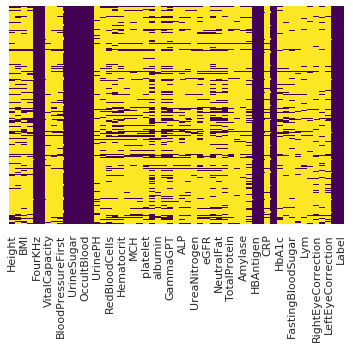

In [12]:
# heatmap of missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
# fill any BMI, Height and Weight missing values based on formula
df['BMI'] = df.apply(lambda row: round(row['Weight']/((row['Height']/100)*(row['Height']/100)),2) 
                     if ~np.isnan(row['Height']) and ~np.isnan(row['Weight']) else row['BMI'], axis=1)

df['Height'] = df.apply(lambda row: round((math.sqrt(row['Weight']/row['BMI'])*100), 2)
                        if np.isnan(row['Height']) else row['Height'], axis=1)
    
df['Weight'] = df.apply(lambda row: round((((row['Height'] * row['Height'])/10000) *row['BMI']), 2)
                        if np.isnan(row['Weight']) else row['Weight'], axis=1)

In [14]:
# drop columns with more than 85% missing values
# fill the rest with categorical mean values for that column
df = df.loc[:, df.isnull().mean() < .85]
for col in df.columns:
    df[col] = df.groupby('Label')[col].transform(lambda x: x.fillna(x.mean()))

### Visualize

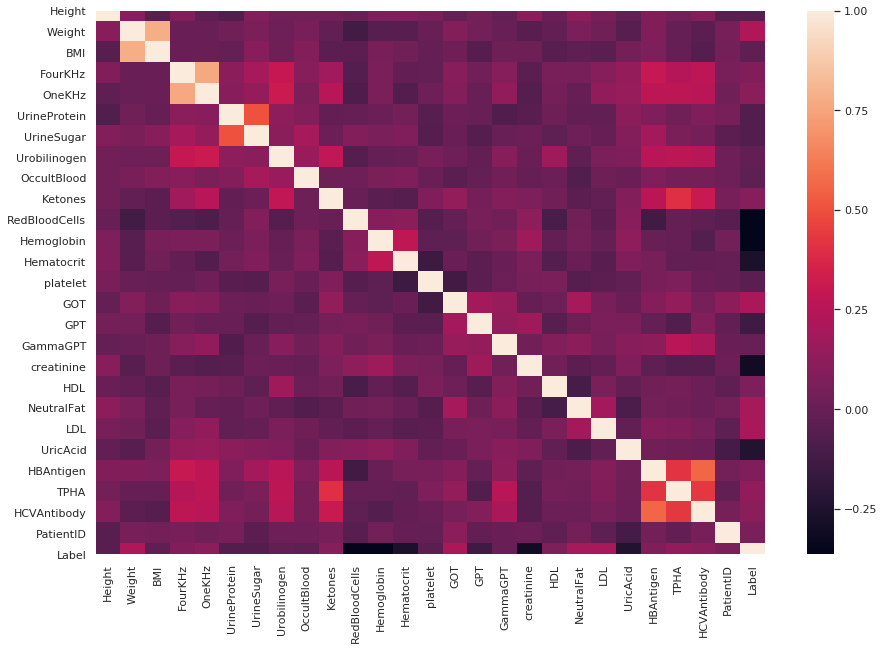

In [15]:
# visualize correlation matrix
corr = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, ax=ax)
plt.show()

### Class Imbalance
1. Check for class imbalance. 
    > Classes are imbalanced with 72:28 ratio
2. Handle the imbalance using SMOTE (Synthetic Minority Oversampling Technique)

In [16]:
# check for class imbalance
accepted = df[df['Label'] == 0]
denied = df[df['Label'] == 1]

accepted_per = round(len(accepted.Label)/(len(accepted.Label)+len(denied.Label)), 2)
denied_per = round(len(denied.Label)/(len(accepted.Label)+len(denied.Label)), 2)

print(accepted_per)
print(denied_per)

0.72
0.28


In [17]:
# correct class imbalance using SMOTE technique
X = df.loc[:, df.columns != 'Label']
y = df.loc[:, df.columns == 'Label']

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Label'])
# we can Check the numbers of our data
print("Length of oversampled data: ",len(os_data_X))
print("No. of acceptance: ",len(os_data_y[os_data_y['Label']==0]))
print("No. of denials: ",len(os_data_y[os_data_y['Label']==1]))
print("Acceptance % in oversampled data: ",len(os_data_y[os_data_y['Label']==0])/len(os_data_X))
print("Denial % in oversampled data: ",len(os_data_y[os_data_y['Label']==1])/len(os_data_X))

Length of oversampled data:  652
No. of acceptance:  326
No. of denials:  326
Acceptance % in oversampled data:  0.5
Denial % in oversampled data:  0.5


### Feature selection

In [18]:
# correlation based feature selection
corr = df.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]

df = df[selected_columns]

In [19]:
# Recursive feature elimination

df_vars=df.columns.values.tolist()
y=['Label']
X=[i for i in df_vars if i not in y]

logreg = LogisticRegression()
rfe = RFE(logreg,13)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
# print(rfe.support_)
# print(rfe.ranking_)

keep_col = df.columns[:-1][rfe.support_ == True]
print("Selected features:")
print(keep_col)

Selected features:
Index(['Weight', 'BMI', 'FourKHz', 'UrineProtein', 'Urobilinogen',
       'OccultBlood', 'Ketones', 'Hemoglobin', 'creatinine', 'UricAcid',
       'HBAntigen', 'TPHA', 'HCVAntibody'],
      dtype='object')


### Model

In [20]:
## Logistic regression model
X=os_data_X[keep_col]
y=os_data_y['Label']

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.240592
         Iterations 8
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.653      
Dependent Variable: Label            AIC:              339.7317   
Date:               2019-10-18 00:00 BIC:              397.9723   
No. Observations:   652              Log-Likelihood:   -156.87    
Df Model:           12               LL-Null:          -451.93    
Df Residuals:       639              LLR p-value:      1.3559e-118
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     8.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Weight         0.4049    0.0289   14.0269  0.0000   0.3483   0.4615
BMI           -1.0006    0.0789  -12.6858  0.0000

In [21]:
# p-value based feature elimination
# eliminate any features with <= 0.08 p-value
col = result.pvalues[:].astype(float) <= 0.08
keep_col = col.index[col.values == True].tolist()

X=os_data_X[keep_col]
y=os_data_y['Label']

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.244425
         Iterations 8
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.647      
Dependent Variable: Label            AIC:              334.7298   
Date:               2019-10-18 00:00 BIC:              370.5702   
No. Observations:   652              Log-Likelihood:   -159.36    
Df Model:           7                LL-Null:          -451.93    
Df Residuals:       644              LLR p-value:      3.8676e-122
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     8.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Weight         0.4062    0.0283   14.3502  0.0000   0.3507   0.4617
BMI           -1.0035    0.0742  -13.5312  0.0000

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Model Performance
1. Model Accuracy
2. Confusion Matrix
3. Model Report
4. ROC curve

#### Model Accuracy

In [23]:
# make predictions and get model accurancy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


#### Confusion Matrix

In [24]:
# get confusion matrix for the model
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[57  5]
 [ 4 65]]


#### Model Report

In [27]:
# get model report
print(classification_report(y_test, y_pred))
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93        62
           1       0.93      0.94      0.94        69

    accuracy                           0.93       131
   macro avg       0.93      0.93      0.93       131
weighted avg       0.93      0.93      0.93       131

Accuracy:  0.9312977099236641
Precision:  0.9285714285714286
Recall:  0.9420289855072463


#### ROC Curve

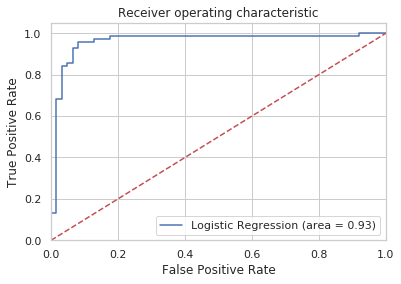

In [28]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_new_1')
plt.show()

### Feature Importance
    Most important feature in the model: TPHA
    Least important feature in the model: Hemoglobin

[[ 0.37379753 -0.94708869  0.76420078 -0.35299587 -1.58886259 -0.24198388
  -1.87079357  1.95504655]]


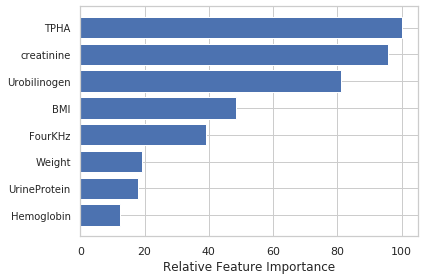

In [29]:
# visualize feature importance
print(logreg.coef_)

feature_importance = abs(logreg.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.barh(pos, feature_importance[sorted_idx], align='center')
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=10)
ax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

### Report

**Approach:**
> Since We're trying to predict whether a particular patient's application should be accepted or not,  this is a binary classification problem. I took the logistic regression approach as it is simple yet effective with such tasks thus making it a good place to start
    
**Methodology:**
> Below are the steps I took through the task:
 - Understand the data through descriptive statistics summary as well as variable correlation
 - Data cleaning/ processing by:
  - Formatting data to get the data in the required format.
   - Checking for missing, invalid, duplicate and extreme outlier values
 - Check for class imbalance
 - Perform feature selection using correlation matrix and recursive feature elimination
 - Build a logistic regression model and improve its performance using p-value based feature elimination
 - Use various techniques to measure model's performance such as model accuracy,confusion matrix, model report and ROC curve
 - Reiterate missing value replacement and feature selection to improve model's performance
    
  
**Implementation:**
> Data processing is done using Pandas <br>
Visualization is mainly done using seaborn and matplotlib <br>
Scikit-learn is used to implement the logistic regression
  - Handling missing values:
    - Effective missing value replacement and feature selection through various techniques was essential to improve model's   performance since most of the values in the dataset were missing and there was low correlation between the target variable and features.
    - Any features with more than 85% missing values were dropped and for rest of the features, missing values were replaced by categorical mean values of the respective features.
  - Handling incorrect/ inconsistent data:
    - There was some inconsistency between 'BMI' column values and those calculated with a formula using respective 'Height' and 'Weight' column values for the same patient. Assuming 'Height' and 'Weight' values were correct, those 'BMI' values were replaced during data processing
  - Handling class imbalance:
    - The two classes required for the model were significantly imbalanced. The imbalance was handled by oversampling the data using SMOTE technique
  - Handling feature selection:
    - Any features with high correlation were dropped as a part of feature elimination followed by recursive feature elimination.
    - In the next step, p-value based feature elimination was used to further narrow down the no of features used.

**Results:**
> Accuracy:
  The model gave 93% accuracy which gives us the overall correctness of the classifier. 93 out of 100 times the classifier is correct
 
> Model Report:
 - Recall:
    This tells us when the application is actually accepted, how often the model predicts the same
 - Precision:
    This tells us when it predicts accepted, how often it is correct

> Confusion Matrix: 
 - The classifier made total of 131 predictions. Out of those the classifier predicted "accepted" 70 times and "denied" 61 times. 
  - In reality, 69 times the application was accepted and 62 times it was denied
  - The matrix gives us an accuracy of 122/131



**Follow-up questions:**
> If external data is available, what would you add, and how would it improve your predictions?
  Exernal data that could be useful for better predictions can be:
   - Patient's credit card information:
      - This could be used to gain insights about patient's physical as well as mental health condition, his/her food habits and lifestyle choices. All these things can be used to get a better understanding of person's wellbeing.
      - It will also give insight on patient's financial status thus providing more information to make more accurate predictions about his/her likelihood of making an insurance claim as well as ability to make the payments on time
   
> In your report, please discuss the business value of your results. How would you sell your analysis to the insurance company? Does it align with what the company wants to achieve?<br><br>
  The results can be used for multiple use cases by the business
   - Risk Assessment:
     - The results can be used to identify profitable operations for the business and reduce loss
     - The model can be used to identify any false positive or false negative application decisions previously made by the business that eventually turned out to be a loss for the business
     - The company wants to provide health insurance for its clients without going into loss. The results can greatly help business make more informed decisions on the applications
     - The analysis can be sold to the insurance company by using model predictions and previous business decisions to show the possibitlity of profit gain or loss reduction for them
   - Marketing Statergy:
     - The results can be used to identify patterns between the kind of customer applications company receives
     - By knowing more about what kind of customers they do/ don't attract, the business will be able to come up with better marketing strategy to gain customers